## QUAAF Python for Finance Crash Course Part 2
### Basic Technical Analysis

#### Picking Up Where We Left Off Last Time With TSLA

In [1]:
#Importing packages
import numpy as np 
import pandas as pd
from pandas_datareader import data #this is the package that we use to pull finanical data from the web
import matplotlib.pyplot as plt #basic plotting package
import seaborn as sns #if you really want to flex always import seaborn whenever you import matplotlib for fancier plots
sns.set_style('darkgrid') #everybody loves darkgrid
import pandas as pd #pandas is THE package for working with and manipulating dataframes; if you can do it in excel, you can do it in pandas
from datetime import date #gives python access to your systems date and time for realtime charts

#Once again we're gonna pull some live share price data from an online source (yahoo finance in this case for simplicity)

#You can pull in data this way from just about anywhere (full-list available at https://pandas-datareader.readthedocs.io/en/latest/)

#defining the equity we're interested in 
equity_ticker = ['TSLA']

#getting the most up to date data we can
today = date.today() #this function automatically updates with today's data


#pulling the timeseries data directly from yahoo finance into a dataframe
equity_data= data.DataReader(equity_ticker, 
                       start='2019-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source='yahoo')['Adj Close'] #obtaining price at close

#checking the 20 most recent values
equity_data.info()
equity_data.head(10)

/Users/BrandonToushan/anaconda/lib/python3.6/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 389 entries, 2019-01-02 to 2020-07-17
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TSLA    389 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


Symbols,TSLA
Date,
2019-01-02,310.119995
2019-01-03,300.359985
2019-01-04,317.690002
2019-01-07,334.959991
2019-01-08,335.350006
2019-01-09,338.529999
2019-01-10,344.970001
2019-01-11,347.260010
2019-01-14,334.399994


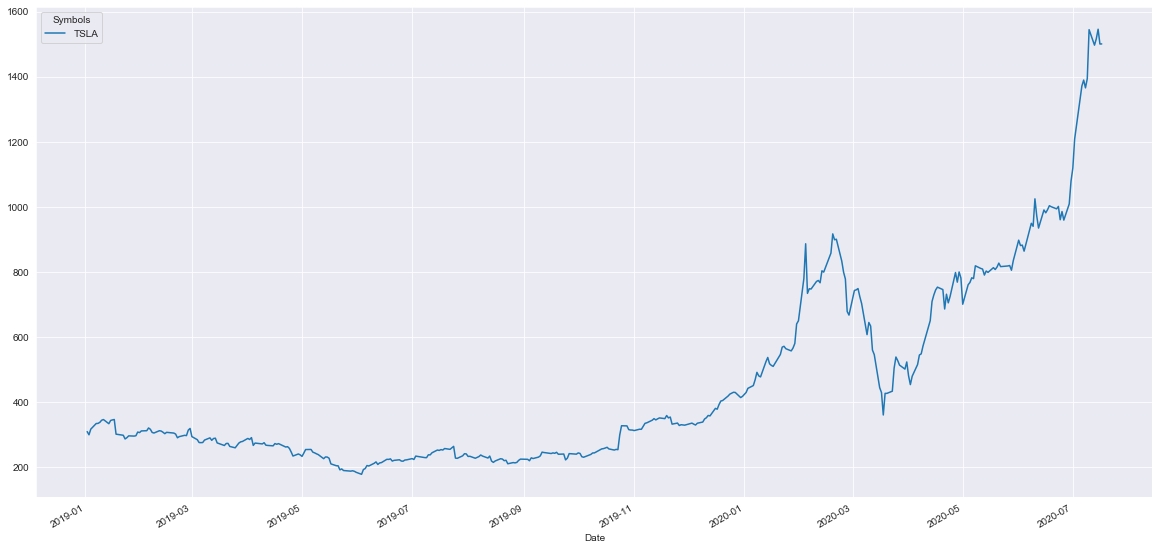

In [2]:
#Taking a glance at the chart for the equity in question
equity_data.plot(grid=True, figsize=(20, 10));

In [3]:
#Calculating 30 & 90 day rolling averages (again I know)
equity_data['TSLA 30d Rolling Avg'] = np.round(equity_data['TSLA'].rolling(window=30).mean(), 2) #30d rolling avg
equity_data['TSLA 90d Rolling Avg'] = np.round(equity_data['TSLA'].rolling(window=90).mean(), 2) #90d rolling avg
equity_data[['TSLA', 'TSLA 30d Rolling Avg', 'TSLA 90d Rolling Avg']].tail() #adding our new values to the end (tail) our data frame

Symbols,TSLA,TSLA 30d Rolling Avg,TSLA 90d Rolling Avg
Date,,,
2020-07-13,1497.060059,1069.65,800.84
2020-07-14,1516.800049,1090.27,809.64
2020-07-15,1546.010010,1112.42,819.00
2020-07-16,1500.640015,1133.01,828.92
2020-07-17,1500.839966,1154.23,838.42


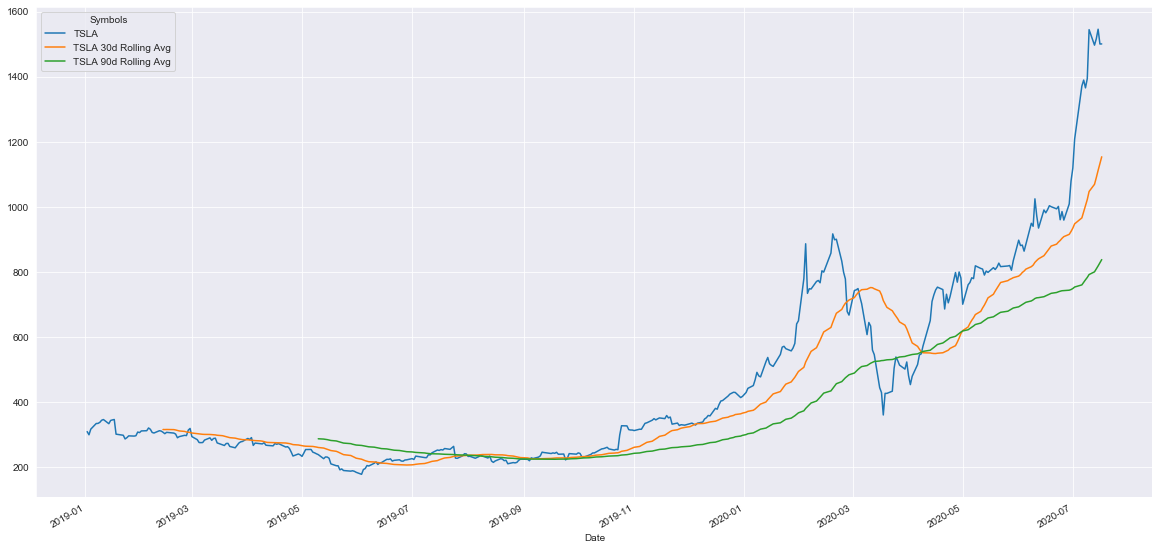

In [4]:
#Plotting again with our calculated rolling averages
equity_data[['TSLA','TSLA 30d Rolling Avg','TSLA 90d Rolling Avg']].plot(grid = True, figsize = (20,10));

In [5]:
#Now lets take this one step further and calculate the overall return & volatility of the share price
import math

#Return
equity_data['Return'] = np.log(equity_data['TSLA']/equity_data['TSLA'].shift(1))

#Now lets calculate the 30d moving volatility of the share price
equity_data['Mov_Volatility'] = equity_data['Return'].rolling(window=30).std()* math.sqrt(30) #30d rolling avg

#Checking df
print(equity_data.tail())

Symbols            TSLA  TSLA 30d Rolling Avg  TSLA 90d Rolling Avg    Return  \
Date                                                                            
2020-07-13  1497.060059               1069.65                800.84 -0.031294   
2020-07-14  1516.800049               1090.27                809.64  0.013100   
2020-07-15  1546.010010               1112.42                819.00  0.019075   
2020-07-16  1500.640015               1133.01                828.92 -0.029786   
2020-07-17  1500.839966               1154.23                838.42  0.000133   

Symbols     Mov_Volatility  
Date                        
2020-07-13        0.252283  
2020-07-14        0.246205  
2020-07-15        0.243364  
2020-07-16        0.247634  
2020-07-17        0.245063  


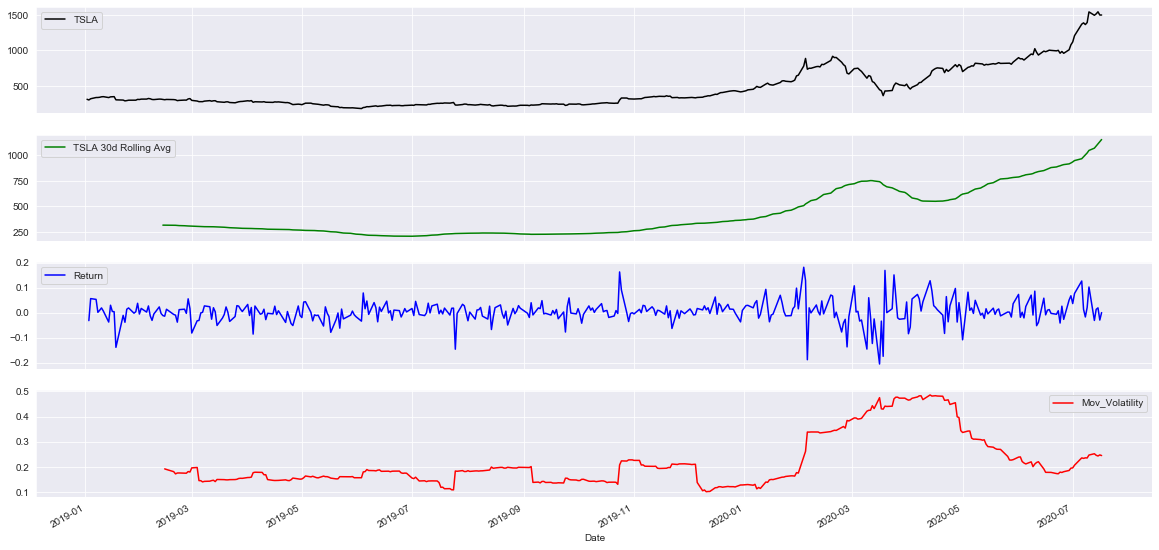

In [6]:
#Visualizing the results of our calcualtions above
equity_data[['TSLA','TSLA 30d Rolling Avg','Return','Mov_Volatility']].plot(subplots=True, style=['black','green','blue','red'],figsize=(20, 10));

### Basic Regression Example (S&P 500/VIX Correlation)

In [7]:
#Pulling in data just as before from Yahoo Finance (just to make our lives easier)

#Defining the tickers we want to take a better look at it
index_tickers = ['^VIX','^GSPC'] #in this case the S&P 500 & CBOE VIZ

#Pulling in data from the web using pandas data.dataReader and Yahoo Finance's API
index_data = data.DataReader(index_tickers, 
                       start='2020-1-1', #selecting the starting date
                       end = today, #charting up to today's date
                       data_source = 'yahoo')['Adj Close'] #obtaining price at close

#Taking a look at the last (most recent) datapoints in our df
index_data.tail()

Symbols,^VIX,^GSPC
Date,,
2020-07-13,32.189999,3155.219971
2020-07-14,29.520000,3197.520020
2020-07-15,27.760000,3226.560059
2020-07-16,28.000000,3215.570068
2020-07-17,25.680000,3224.729980


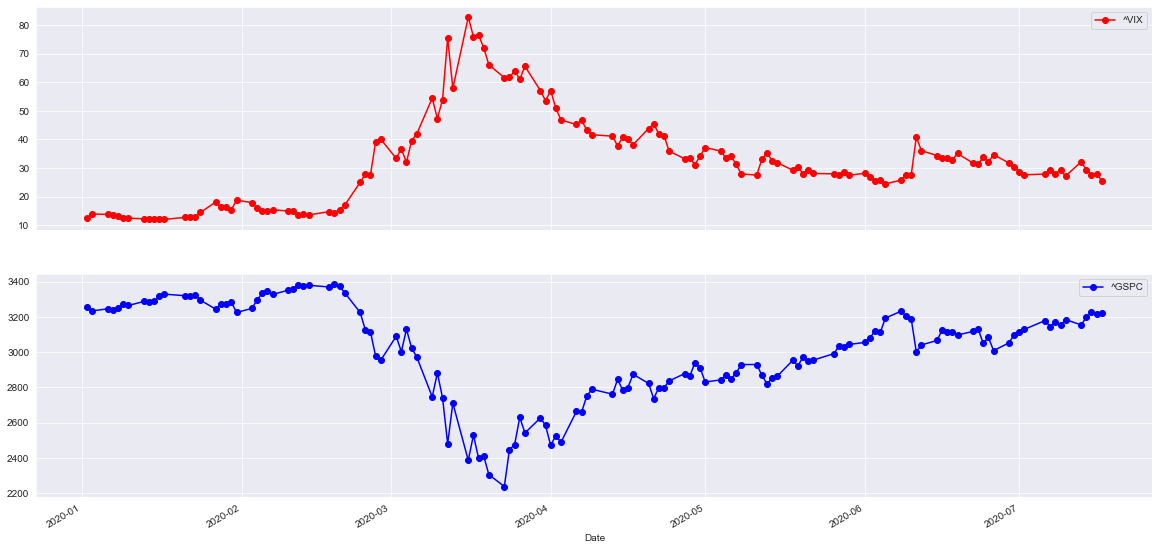

In [8]:
#Quick and dirty visualization of our data to start with like always
index_data.plot(subplots=True, style=['ro-','bo-'], figsize=(20, 10));

In [9]:
#Now lets calculate returns for our tickers just like above
returns = np.log(index_data / index_data.shift(1)) #Creating a new df containing just the calculated returns of the tickers in index_data
returns.dropna(inplace = True) #Getting rid of any NaNs
returns.head()

Symbols,^VIX,^GSPC
Date,,
2020-01-03,0.117159,-0.007085
2020-01-06,-0.012200,0.003527
2020-01-07,-0.004342,-0.002807
2020-01-08,-0.024965,0.004890
2020-01-09,-0.070056,0.006633


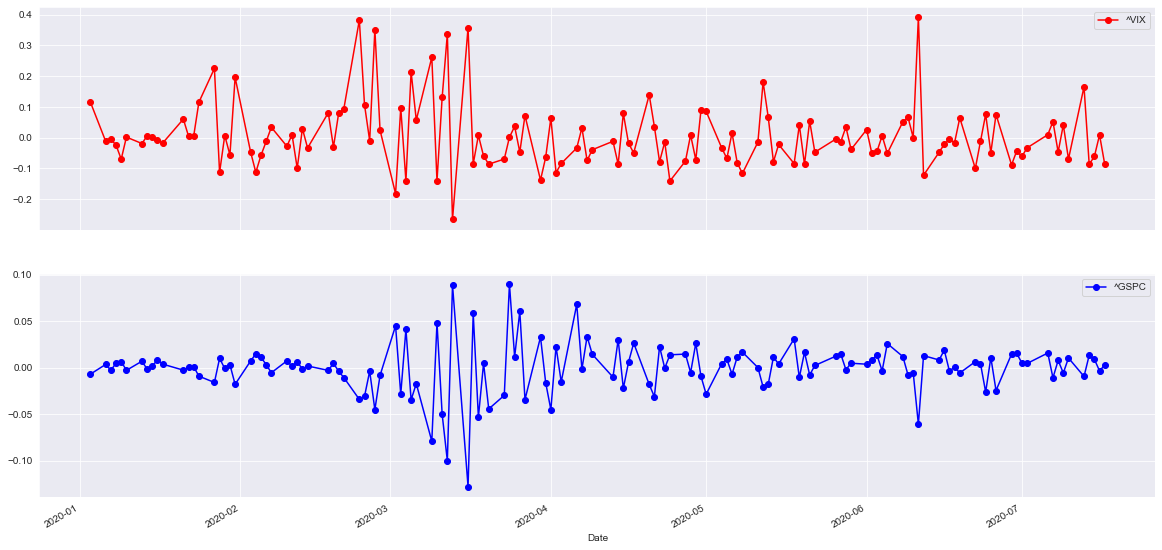

In [10]:
#Plotting the results
returns.plot(subplots=True, style=['ro-','bo-'], figsize=(20, 10));

In [11]:
###Now we're gonna fit a simple Linear Regression to our data and find the correlation between the S&P and VIX

###On the quant side this kind of procedure can be very useful for taking a look at just what factors are really effecting
###your companies share price. This exact API and methodology can be used to pull in and calculate correlations for just about
###any economic data in existence from jet fuel prices to forex futures and as a result is extremely powerful

#Extracting values from our 'returns' dataframe
xdata = returns['^GSPC'].values #for this case we will say the S&P is the independent variable (our x var)
ydata = returns['^VIX'].values #and VIX is our dependent variable (our y var)
regression = np.polyfit(x=xdata, y=ydata, deg=1) 

#np.polyfit fits a simple least squares polynomial to the data,
#you don't need to know the ins and outs of what this means but essentially it draws a line that best fits the
#data (as you'll see below) deg = 1 is a straight line, deg = 2 is a quadratic, deg = 3 is a cubic and so on

#Printing out the results of our (extremely basic) model
regression

array([-2.84344727,  0.00509803])

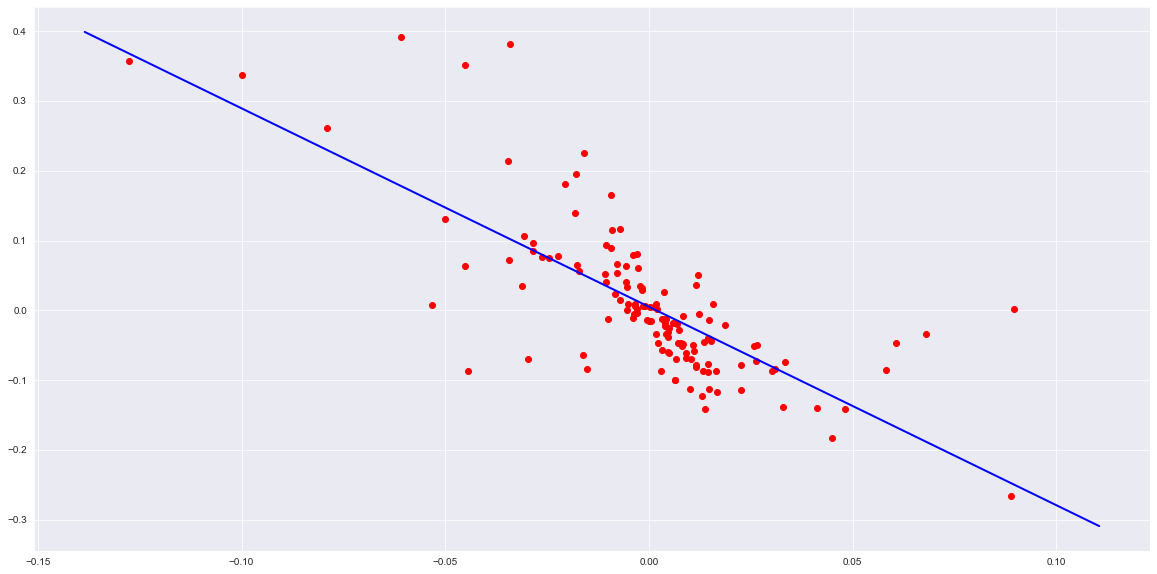

In [13]:
#Visualizing the linear model we just fit above
fig, ax = plt.subplots(figsize = (20,10))
plt.plot(xdata, ydata, 'ro')
ax = plt.axis()
x = np.linspace(ax[0], ax[1] + 0.01)
plt.plot(x, np.polyval(regression, x), 'b', lw=2);

In [ ]:
#Calculating the correlation between the two
returns.corr()

In [ ]:
#Plotting the correlation between the two
returns['^GSPC'].rolling(window=30).corr(returns['^VIX']).plot(figsize = (20,10),c='b');

### Stay Tuned for Chapter 3: Stats, Math & Quantitative Porftolio Optimization in Python